# Create Syntetic Tennis Court

82
109
118
64
13
54


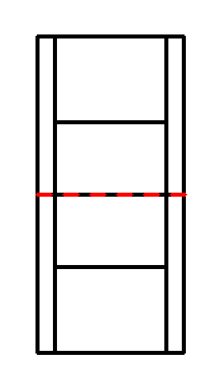

In [2]:
import cv2
import numpy as np
import matplotlib as plt
from IPython.display import display
import matplotlib.pyplot as plt

# Conversion scale: 1 meter = 10 pixels
scale = 10

# Define dimensions in pixels
SINGLE_LINE_WIDTH = int(8.23 * scale)
DOUBLE_LINE_WIDTH = int(10.97 * scale)
HALF_COURT_LINE_HEIGHT = int(11.88 * scale)
SERVICE_LINE_WIDTH = int(6.4 * scale)
DOUBLE_ALLY_DIFFERENCE = int(1.37 * scale)
NO_MANS_LAND_HEIGHT = int(5.48 * scale)

print(SINGLE_LINE_WIDTH)
print(DOUBLE_LINE_WIDTH)
print(HALF_COURT_LINE_HEIGHT)
print(SERVICE_LINE_WIDTH)
print(DOUBLE_ALLY_DIFFERENCE)
print(NO_MANS_LAND_HEIGHT)

# Calculate overall court dimensions
court_width = DOUBLE_LINE_WIDTH
court_length = 2 * HALF_COURT_LINE_HEIGHT

# Create a blank image, white background
# Adding 20 pixels padding around the court for visibility
img_height = court_length + 40
img_width = court_width + 40
court_img = np.ones((img_height, img_width, 3), dtype="uint8") * 255

# Start drawing
# Outer lines
cv2.rectangle(court_img, (20, 20), (20+court_width, 20+court_length), (0, 0, 0), 2)

# Service lines
cv2.line(court_img, (20, 20 + HALF_COURT_LINE_HEIGHT), (20 + court_width, 20 + HALF_COURT_LINE_HEIGHT), (0, 0, 0), 2)
cv2.line(court_img, (20 + DOUBLE_ALLY_DIFFERENCE, 20), (20 + DOUBLE_ALLY_DIFFERENCE, 20 + court_length), (0, 0, 0), 2)
cv2.line(court_img, (20 + court_width - DOUBLE_ALLY_DIFFERENCE, 20), (20 + court_width - DOUBLE_ALLY_DIFFERENCE, 20 + court_length), (0, 0, 0), 2)

# Middle line (net line, drawn as a dashed line for visibility)
for i in range(20, court_width + 20, 20):
    cv2.line(court_img, (i, 20 + HALF_COURT_LINE_HEIGHT), (i+10, 20 + HALF_COURT_LINE_HEIGHT), (0, 0, 255), 2)

# No-man's land (The service boxes)
cv2.rectangle(court_img, (20 + DOUBLE_ALLY_DIFFERENCE, 20 + HALF_COURT_LINE_HEIGHT - NO_MANS_LAND_HEIGHT), 
              (20 + court_width - DOUBLE_ALLY_DIFFERENCE, 20 + HALF_COURT_LINE_HEIGHT + NO_MANS_LAND_HEIGHT), (0, 0, 0), 2)



# Display the court
# Use matplotlib to display the image
plt.imshow(cv2.cvtColor(court_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying correctly
plt.axis('off')  # Hide axes
plt.show()


In [3]:
# Define the file name and path where you want to save the image
file_path = './tennis_court/tennis_court.png'

# Save the image
cv2.imwrite(file_path, court_img)

print(f"Image saved successfully at {file_path}")

Image saved successfully at ./tennis_court/tennis_court.png


Number of keypoints: 14


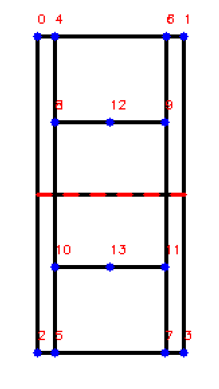

Shape (276, 149, 3)


In [8]:
# Define the keypoints based on the tennis court dimensions with numbered keys
keypoints = {
    0: (20, 20),  # top_left_corner
    1: (20 + court_width, 20),  # top_right_corner
    2: (20, 20 + court_length),  # bottom_left_corner
    3: (20 + court_width, 20 + court_length),  # bottom_right_corner
    12: (20 + court_width // 2, 25 + court_length // 4),  # center_service_line_top
    13: (20 + court_width // 2, 15 + 3 * court_length // 4),  # center_service_line_bottom
    4: (20 + DOUBLE_ALLY_DIFFERENCE, 20),  # left_service_line_intersection_top
    6: (20 + court_width - DOUBLE_ALLY_DIFFERENCE, 20),  # right_service_line_intersection_top
    8: (20 + DOUBLE_ALLY_DIFFERENCE, 25 + (HALF_COURT_LINE_HEIGHT // 2)),  # left_top_half_court
    9: (20 + DOUBLE_ALLY_DIFFERENCE + SINGLE_LINE_WIDTH, 25 + (HALF_COURT_LINE_HEIGHT // 2)),  # right_top_half_court
    7: (20 + DOUBLE_ALLY_DIFFERENCE + SINGLE_LINE_WIDTH, 20 + court_length),  # right_bottom_single_corner
    5: (20 + DOUBLE_ALLY_DIFFERENCE, 20 + court_length),  # left_bottom_single_corner
    10: (20 + DOUBLE_ALLY_DIFFERENCE, 15 + court_length - (HALF_COURT_LINE_HEIGHT // 2)),  # left_bottom_half_court
    11: (20 + DOUBLE_ALLY_DIFFERENCE + SINGLE_LINE_WIDTH, 15 + court_length - (HALF_COURT_LINE_HEIGHT // 2))  # right_bottom_half_court
}

print("Number of keypoints:", len(keypoints))
court_img2 = court_img.copy()

# Draw the keypoints on the court image
for i, point in keypoints.items():
    cv2.circle(court_img2, point, radius=3, color=(255, 0, 0), thickness=-1)
    cv2.putText(court_img2, str(i), (point[0], point[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(court_img2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying correctly
plt.axis('off')  # Hide axes
plt.show()

# Save the image with keypoints
cv2.imwrite('./tennis_court/tennis_court_with_keypoints.png', court_img2)


print('Shape',court_img2.shape)

In [11]:
# Print out the keypoints and check if any are outside the image bounds
print(court_img2.shape)
for name, (x, y) in keypoints.items():
    print(f"{name}: (X: {x}, Y: {y})")
    if x < 0 or x > court_img2.shape[1] or y < 0 or y > court_img2.shape[0]:
        print(f"Warning: Keypoint {name} is outside the image bounds!")


(276, 149, 3)
0: (X: 20, Y: 20)
1: (X: 129, Y: 20)
2: (X: 20, Y: 256)
3: (X: 129, Y: 256)
12: (X: 74, Y: 84)
13: (X: 74, Y: 192)
4: (X: 33, Y: 20)
6: (X: 116, Y: 20)
8: (X: 33, Y: 84)
9: (X: 115, Y: 84)
7: (X: 115, Y: 256)
5: (X: 33, Y: 256)
10: (X: 33, Y: 192)
11: (X: 115, Y: 192)


In [6]:
import json

# Assuming 'keypoints' is your dictionary or list of keypoints
keypoints_data = {'keypoints': keypoints}

# Choose a file name
filename = './keypoints.json'

# Write the keypoints data to a JSON file
with open(filename, 'w') as file:
    json.dump(keypoints_data, file)


# Homography Transformation

In [ ]:

# Assuming 'predicted_keypoints' are your model predictions
# For demonstration, let's create a placeholder for these predicted keypoints

predicted_keypoints = np.array([[x1, y1], [x2, y2], ..., [x14, y14]])

# Convert source keypoints from the dictionary to an ordered list of tuples
source_keypoints = [keypoints[i] for i in sorted(keypoints.keys())]

# Ensure 'source_keypoints' and 'predicted_keypoints' are in the same order of corresponding points

# Calculate the homography matrix
H, _ = cv2.findHomography(np.array(source_keypoints), predicted_keypoints, method=cv2.RANSAC)

# To transform a source image to match the perspective of the detected keypoints
# warped_image = cv2.warpPerspective(source_image, H, (destination_width, destination_height))

# Or, if you're just transforming points (e.g., other keypoints, not part of the model prediction)
# transformed_points = cv2.perspectiveTransform(np.array([other_source_points]), H)
